#### Data Visualization Part II on 17th Feb 2022

In [ ]:
"""
Agenda:
(1) Recap of last week 
(2) Data Visualization part II
"""

In [ ]:
"""
Common types of graphs and uses
(1)Line chart-      time series/ trends
(2)Scatter plot     
(3)Bar chat 
     vertical   -comparison of few items
     horizontal  - comparison of many items
     multiple bar - comparison of multiple features
     stacked      -- comparison with breakdown
(4) Pie chart     -- Breakdown 
(5) Box plot       - Distribution   (already covered)
(5) Heatmaps       -- Patterns
"""

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
        


#### (1) Line chart

#### Example 1: Concept demonstration using simple example

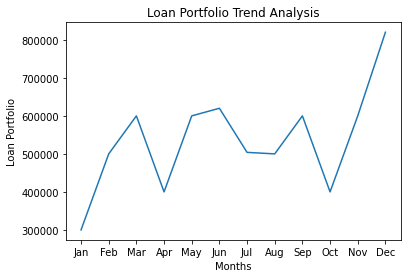

In [2]:
#Line chart - Time Series trend over time
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
total_loans = [300000,500000,600000,400000,600000,620000,504000,500000,600000,400000,600000,820000]
#plt.plot(x,y)
plt.plot(months,total_loans)
plt.xlabel('Months')
plt.ylabel('Loan Portfolio')
plt.title('Loan Portfolio Trend Analysis')
plt.show()

#### Example 2: Example using dataset from banks balance sheets 

In [3]:
"""
Problem:
Visualize loan portfolio trend analysis for bank with code A134 from 2010 to 2021
"""
#Data aquisition
data_file="bsh.csv"
df=pd.read_csv(data_file)

In [4]:
#Data exploration
#df.head()
#df.info()
#df.describe()
#Sort
df=df.sort_values(by='BSH_REPORTINGDATE')
#df.head()

In [5]:
#Data transformation
#(1) Transform text date to date format
from datetime import datetime
df['REPORTINGDATE'] = (df['BSH_REPORTINGDATE']).apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))

#Add total columns- in two decimal places
df['TOTAL'] = (df['BSH_SHILLINGACCOUNTS']+df['BSH_FOREXACCTSSHSEQUIV']).apply(lambda x: "{:.2f}".format(x) )

#df=df.sort_values(by='REPORTINGDATE')

In [6]:
#Filter: bank with code = A134 on total loans(BSH_DESCRIPTIONNO=25) in 2021
#conditions
#(1)Institutioncode=A134
#(2)BSH_DESCRIPTIONNO=25

mask=((df['INSTITUTIONCODE']=='A134') & (df['BSH_DESCRIPTIONNO']==25))
df_A134_Loans=df[mask]
df_A134_Loans = df_A134_Loans.sort_values(by='REPORTINGDATE')
#df[((df['INSTITUTIONCODE']=='A134') & (df['BSH_DESCRIPTIONNO']==25))].sort_values(by='REPORTINGDATE'


In [7]:
df_A134_Loans.head()

,INSTITUTIONCODE,BSH_REPORTINGDATE,BSH_DESCRIPTIONNO,BSH_SHILLINGACCOUNTS,BSH_FOREXACCTSINUSD,BSH_FOREXACCTSSHSEQUIV,REPORTINGDATE,TOTAL
3229,A134,31/01/2010,25,3.617900e+10,0.0,0.0,2010-01-31,36178995072.64
18906,A134,28/02/2010,25,3.586933e+10,0.0,0.0,2010-02-28,35869327048.00
11723,A134,31/03/2010,25,3.607683e+10,0.0,0.0,2010-03-31,36076830449.00
14886,A134,30/04/2010,25,3.601168e+10,0.0,0.0,2010-04-30,36011683367.11
180,A134,31/05/2010,25,3.645304e+10,0.0,0.0,2010-05-31,36453035763.65


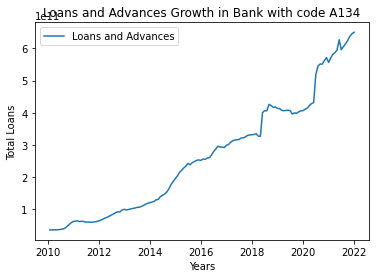

In [9]:
#draw line graph
import matplotlib
import matplotlib.pyplot as plt
# show plots inline
%matplotlib inline
dates = df_A134_Loans[['REPORTINGDATE']].sort_values(by='REPORTINGDATE')
loans = df_A134_Loans['TOTAL'].astype(float)
plt.plot(dates,loans,label='Loans and Advances')
plt.xlabel("Years")
plt.ylabel("Total Loans")
plt.legend()
plt.title("Loans and Advances Growth in Bank with code A134")
plt.show()



In [10]:
#Add another bank with code Crdb A129,NMB A150
mask_TCB=((df['INSTITUTIONCODE']=='A134') & (df['BSH_DESCRIPTIONNO']==25))
mask_CRDB=((df['INSTITUTIONCODE']=='A129') & (df['BSH_DESCRIPTIONNO']==25))
mask_NMB=((df['INSTITUTIONCODE']=='A150') & (df['BSH_DESCRIPTIONNO']==25))
df_TCB_Loans=df[mask_TCB]
df_CRDB_Loans=df[mask_CRDB]
df_NMB_Loans=df[mask_NMB]
df_TCB_Loans = df_TCB_Loans.sort_values(by='REPORTINGDATE')
df_CRDB_Loans = df_CRDB_Loans.sort_values(by='REPORTINGDATE')
df_NMB_Loans = df_NMB_Loans.sort_values(by='REPORTINGDATE')

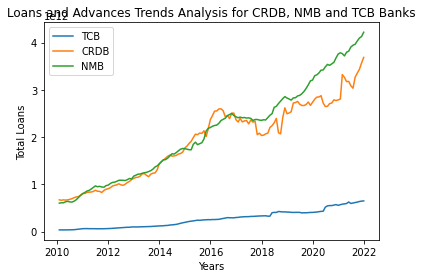

In [11]:
#draw line graphs
import matplotlib
import matplotlib.pyplot as plt
# show plots inline
%matplotlib inline
dates_TCB = df_TCB_Loans[['REPORTINGDATE']].sort_values(by='REPORTINGDATE')
loans_TCB = df_TCB_Loans['TOTAL'].astype(float)
dates_CRDB = df_CRDB_Loans[['REPORTINGDATE']].sort_values(by='REPORTINGDATE')
loans_CRDB = df_CRDB_Loans['TOTAL'].astype(float)
dates_NMB = df_NMB_Loans[['REPORTINGDATE']].sort_values(by='REPORTINGDATE')
loans_NMB = df_NMB_Loans['TOTAL'].astype(float)
plt.plot(dates_TCB,loans_TCB,label='TCB')
plt.plot(dates_CRDB,loans_CRDB,label='CRDB')
plt.plot(dates_NMB,loans_NMB,label='NMB')
plt.xlabel("Years")
plt.ylabel("Total Loans")
plt.legend()
plt.title("Loans and Advances Trends Analysis for CRDB, NMB and TCB Banks")
#plt.grid()
plt.show()


#### (2) Scatter Plot

#### Example 1: Simple Scatter plot

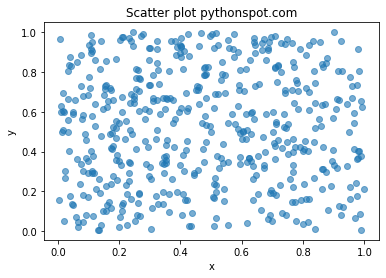

In [12]:
N=500
x = np.random.rand(N)
y = np.random.rand(N)

# Plot
plt.scatter(x, y, alpha=0.6)   # use default color
#plt.scatter(x, y, color='b', alpha=0.6)  #color specified
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Example on Scatter plot using balance sheet data

In [13]:
"""
#December's total assets for all banks with code A189 and A124
"""
from datetime import datetime
mask1 = ((pd.DatetimeIndex(df['REPORTINGDATE']).month==12) & (df['BSH_DESCRIPTIONNO']==77) & (df['INSTITUTIONCODE']=='A189'))
mask2 = ((pd.DatetimeIndex(df['REPORTINGDATE']).month==12) & (df['BSH_DESCRIPTIONNO']==77) & (df['INSTITUTIONCODE']=='A124'))
d2_A189 = df[mask1]
d2_A124 = df[mask2]

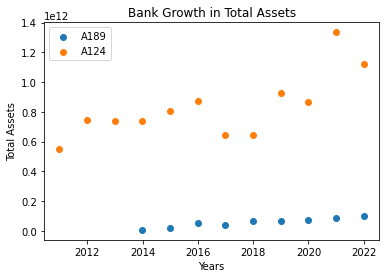

<Figure size 576x432 with 0 Axes>

In [14]:
#Problem:
#December's total assets for banks with code A
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
dates1 = d2_A189[['REPORTINGDATE']].sort_values(by='REPORTINGDATE')
total_assets1 = d2_A189['TOTAL'].astype(float)
dates2 = d2_A124[['REPORTINGDATE']].sort_values(by='REPORTINGDATE')
total_assets2 = d2_A124['TOTAL'].astype(float)
plt.scatter(dates1, total_assets1, label='A189')
plt.scatter(dates2, total_assets2, label='A124')
plt.xlabel("Years")
plt.ylabel("Total Assets")
plt.legend()
plt.title("Bank Growth in Total Assets")
plt.figure(figsize=(8, 6))
plt.show()



In [15]:
"""
Visualize December position of Loans and Advances of three banks

"""

'\nVisualize December position of Loans and Advances of three banks\n\n'

In [16]:
mask_TCB=((df['INSTITUTIONCODE']=='A134') & (df['BSH_DESCRIPTIONNO']==25) & (pd.DatetimeIndex(df['REPORTINGDATE']).month==12))
mask_CRDB=((df['INSTITUTIONCODE']=='A129') & (df['BSH_DESCRIPTIONNO']==25) & (pd.DatetimeIndex(df['REPORTINGDATE']).month==12))
mask_NMB=((df['INSTITUTIONCODE']=='A150') & (df['BSH_DESCRIPTIONNO']==25) & (pd.DatetimeIndex(df['REPORTINGDATE']).month==12))
df_TCB_Loans=df[mask_TCB]
df_CRDB_Loans=df[mask_CRDB]
df_NMB_Loans=df[mask_NMB]
df_TCB_Loans = df_TCB_Loans.sort_values(by='REPORTINGDATE')
df_CRDB_Loans = df_CRDB_Loans.sort_values(by='REPORTINGDATE')
df_NMB_Loans = df_NMB_Loans.sort_values(by='REPORTINGDATE')

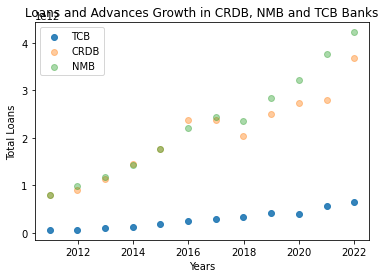

In [17]:
#draw line graphs
import matplotlib
import matplotlib.pyplot as plt
# show plots inline
%matplotlib inline
dates_TCB = df_TCB_Loans[['REPORTINGDATE']].sort_values(by='REPORTINGDATE')
loans_TCB = df_TCB_Loans['TOTAL'].astype(float)
dates_CRDB = df_CRDB_Loans[['REPORTINGDATE']].sort_values(by='REPORTINGDATE')
loans_CRDB = df_CRDB_Loans['TOTAL'].astype(float)
dates_NMB = df_NMB_Loans[['REPORTINGDATE']].sort_values(by='REPORTINGDATE')
loans_NMB = df_NMB_Loans['TOTAL'].astype(float)
plt.scatter(dates_TCB,loans_TCB,label='TCB',alpha=0.9)
plt.scatter(dates_CRDB,loans_CRDB,label='CRDB',alpha=0.4)
plt.scatter(dates_NMB,loans_NMB,label='NMB',alpha=0.4)
plt.xlabel("Years")
plt.ylabel("Total Loans")
plt.legend()
plt.title("Loans and Advances Growth in CRDB, NMB and TCB Banks")
#plt.grid()
plt.show()

#### Bar chart

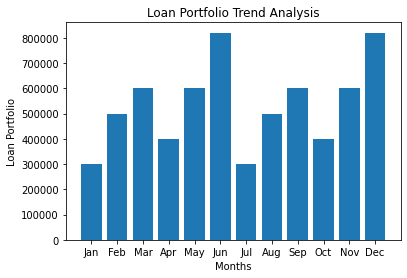

In [18]:
#Simple bar graph
#Vertical bar
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
total_loans = [300000,500000,600000,400000,600000,820000,300000,500000,600000,400000,600000,820000]
#plt.plot(x,y)
plt.bar(months,total_loans)
plt.xlabel('Months')
plt.ylabel('Loan Portfolio')
plt.title('Loan Portfolio Trend Analysis')
plt.show()

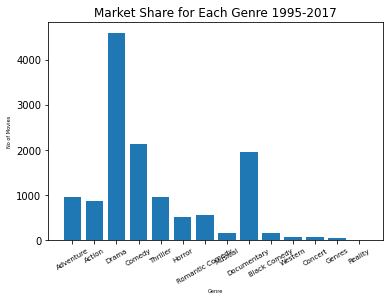

In [19]:
#Example two
label = ['Adventure', 'Action', 'Drama', 'Comedy',
         'Thriller', 'Horror', 'Romantic Comedy',
         'Musical','Documentary', 'Black Comedy', 'Western', 
         'Concert', 'Genres', 'Reality']

no_movies = [941, 854, 4595, 2125, 942, 509, 
             548, 149, 1952, 161, 64, 61, 35, 5]
x = np.arange(len(label))
plt.bar(x, no_movies)
plt.xlabel('Genre', fontsize=5)
plt.ylabel('No of Movies', fontsize=5)
#plt.xticks(x, label, fontsize=5, rotation=30)
plt.xticks(x, label, fontsize=7, rotation=30)
plt.title('Market Share for Each Genre 1995-2017')
plt.show()

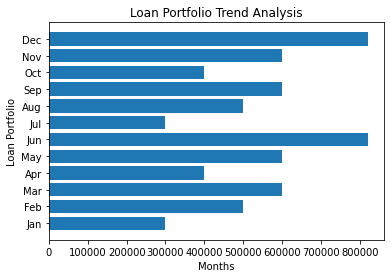

In [20]:
#horizontal bar
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
total_loans = [300000,500000,600000,400000,600000,820000,300000,500000,600000,400000,600000,820000]
#plt.plot(x,y)
plt.barh(months,total_loans)
plt.xlabel('Months')
plt.ylabel('Loan Portfolio')
plt.title('Loan Portfolio Trend Analysis')
plt.show()

#### Histogram

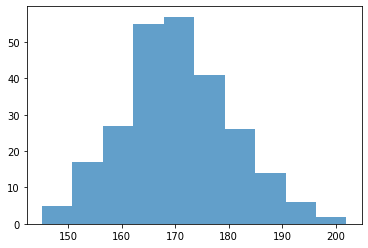

In [21]:
#### Example 1:
x = np.random.normal(170, 10, 250)
plt.hist(x,alpha=0.7) # default color
#specify filling color
#plt.hist(x,color='b',alpha=0.7)
plt.show() 

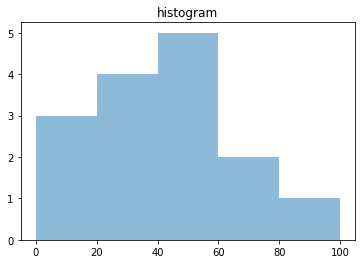

In [22]:
#https://www.tutorialspoint.com/numpy/numpy_histogram_using_matplotlib.htm

x = np.array([22,87,5,43,56,73,55,54,11,20,51,5,79,31,27]) 
plt.hist(x, bins = [0,20,40,60,80,100],alpha=0.5) #alpha = transparency level
plt.title("histogram") 
plt.show()

#### Pie Chart

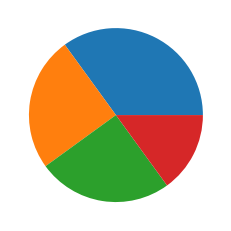

In [23]:
y = np.array([35, 25, 25, 15])
plt.pie(y) # simple pie chart
plt.show() 

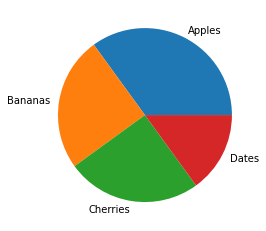

In [24]:
#Chart with labels
y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
plt.pie(y, labels = mylabels) # with labels
plt.show() 

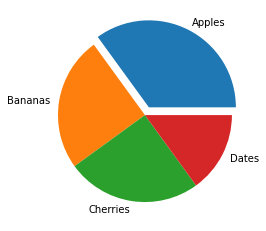

In [25]:
#Chart with explode
y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
myexplode = [0.1, 0, 0, 0] # specify which wedge you want to explode
plt.pie(y, labels = mylabels, explode = myexplode)
plt.show() 

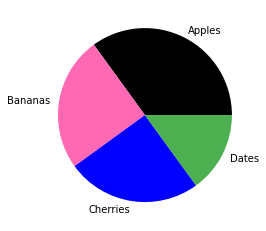

In [26]:
#sET COLOR
y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
mycolors = ["black", "hotpink", "b", "#4CAF50"]
plt.pie(y, labels = mylabels, colors = mycolors)
plt.show()

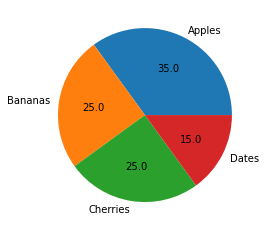

In [27]:
#PERCENTAGES
y = np.array([35, 25, 25, 15])
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
mycolors = ["black", "hotpink", "b", "#4CAF50"]
plt.pie(y, labels = mylabels, autopct='%1.1f') # double %% required
#to show the % symbol, use the following:
#plt.pie(y, labels = mylabels, autopct='%1.1f%%') # double %% required
plt.show() 

df.head()
               A         B         C         D
one    0.443030  0.863434  0.151507  0.229245
two    0.512644  0.260556  0.848605  0.080434
three  0.602575  0.924276  0.153891  0.148128
four   0.526552  0.985947  0.049305  0.081335
five   0.544410  0.638397  0.579114  0.762597


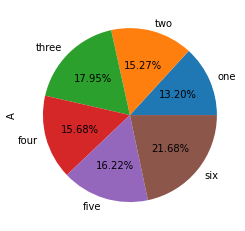

In [28]:
#pie chart from dataframe
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=['A', 'B', 'C', 'D'])
print("df.head()\n",df.head())
df.A.plot.pie(autopct='%1.2f%%')
plt.show()

In [29]:
#### pLOTING WITH PANDAS: Move to ch 11 Into to matplot lib


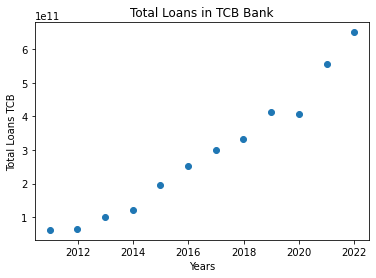

<Figure size 576x432 with 0 Axes>

In [31]:
#Problem:
#December's total loans TCB 


import matplotlib
import matplotlib.pyplot as plt
# show plots inline
%matplotlib inline
#dates = df_A189[['REPORTINGDATE']]
dates = df_TCB_Loans[['REPORTINGDATE']].sort_values(by='REPORTINGDATE')
#dates = [1,2,3,4,5]
total_assets = df_TCB_Loans['TOTAL'].astype(float)
plt.scatter(dates,total_assets)
plt.xlabel("Years")
plt.ylabel("Total Loans TCB")
plt.title("Total Loans in TCB")
plt.figure(figsize=(8, 6))
plt.show()

#### Ploting with Pandas



           A         B         C         D
0   0.058903  0.314613  0.514716  0.497272
10 -0.707335 -0.536760  0.922591 -0.586523
20  1.314240 -0.874894  1.767965  0.377265
30 -1.326994 -0.860309  2.550901 -0.813959
40 -1.381536  0.947750  2.868363 -1.259208


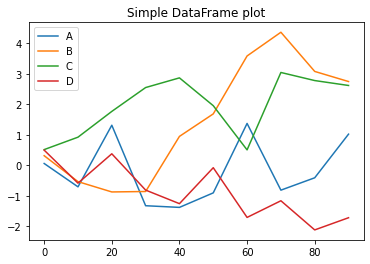

In [32]:
#Dataframe line plots
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                   columns=['A', 'B', 'C', 'D'],
                   index=np.arange(0, 100, 10))
print(df.head())
df.plot()   # legend at loc='best'
plt.title('Simple DataFrame plot')
#plt.legend(loc='upper left')
plt.show()

   A         B         C
0  0  1.943909 -2.265067
1  1  2.010737 -3.483089
2  2  2.049914 -3.522376
3  3  3.132359 -5.041354
4  4  2.110764 -5.149584
5  5  3.501704 -5.590613
6  6  3.602428 -6.733194
7  7  4.650697 -6.764096
8  8  4.536644 -4.803279
9  9  4.766498 -4.091513


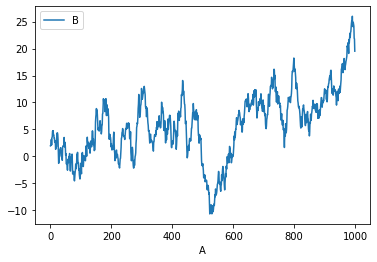

In [33]:
#One column vs other
# np.random.randn(1000, 2): 1000 rows and 2 columns
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()
df3["A"] = pd.Series(list(range(len(df3))))
df3.sort_index(axis=1, inplace=True)
print(df3.head(10))
df3.plot(x="A", y="B");

              A         B         C         D
one    0.536905  0.748527  0.418533  0.179803
two    0.197402  0.789945  0.439506  0.578624
three  0.746677  0.912799  0.651105  0.973588
four   0.444736  0.587813  0.534817  0.848202
five   0.021358  0.247926  0.257550  0.337372


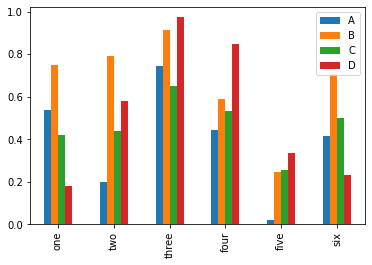

In [34]:
#Data frame bar plots
df = pd.DataFrame(np.random.rand(6, 4),
                   index=['one', 'two', 'three', 'four', 'five', 'six'],
                    columns=['A', 'B', 'C', 'D'])
print(df.head())
df.plot.bar() # can use barh for horizontal bars
plt.show()

              A         B         C         D
one    0.307626  0.727760  0.736283  0.135309
two    0.069296  0.772121  0.247739  0.585911
three  0.162173  0.383863  0.902889  0.456387
four   0.004342  0.847732  0.397249  0.014699
five   0.320957  0.479674  0.839864  0.734476


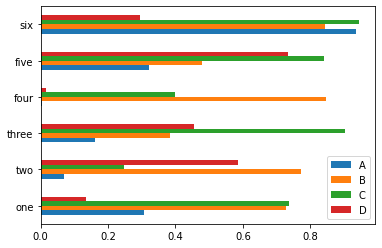

In [35]:
#horizontal bar
df = pd.DataFrame(np.random.rand(6, 4),
                   index=['one', 'two', 'three', 'four', 'five', 'six'],
                   columns=['A', 'B', 'C', 'D'])
print(df.head())
df.plot.barh() 
plt.show()

df.head()               A         B         C         D
one    0.771060  0.550550  0.107701  0.587153
two    0.036490  0.648647  0.241211  0.617131
three  0.434101  0.382995  0.266381  0.087745
four   0.511573  0.305652  0.628677  0.873610
five   0.461283  0.966210  0.610418  0.240523

df[['A','B']].head()
               A         B
one    0.771060  0.550550
two    0.036490  0.648647
three  0.434101  0.382995
four   0.511573  0.305652
five   0.461283  0.966210


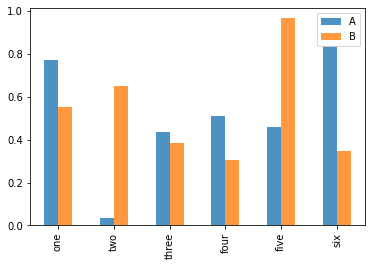

In [36]:
#ploting two columns
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=['A', 'B', 'C', 'D'])
print("df.head()",df.head())
print("\ndf[['A','B']].head()\n",df[['A','B']].head())
df[['A','B']].plot.bar(alpha=0.8)
plt.show()

df.head()               A         B         C         D
one    0.922619  0.501456  0.415959  0.062088
two    0.882610  0.210236  0.476852  0.912551
three  0.528955  0.336047  0.649350  0.280728
four   0.163155  0.310835  0.958890  0.427814
five   0.248300  0.649460  0.439340  0.244995


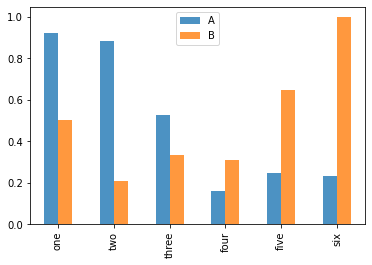

In [37]:
#alternative two columns
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=['A', 'B', 'C', 'D'])
print("df.head()",df.head())
df.plot.bar(y=['A','B'],alpha=0.8)
plt.show()

df.head()
               A         B         C         D
one    0.312926  0.667293  0.651276  0.792511
two    0.997736  0.206943  0.150659  0.699390
three  0.392480  0.077104  0.124983  0.140630
four   0.520401  0.587496  0.391170  0.170144
five   0.926970  0.773311  0.155394  0.012552


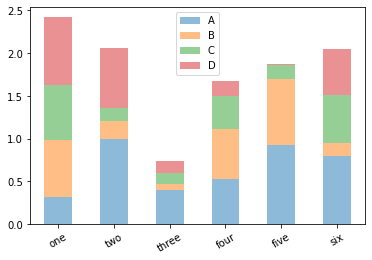

In [38]:
#stacked bar
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=['A', 'B', 'C', 'D'])
print("df.head()\n",df.head())
df.plot.bar(stacked=True, alpha=0.5, rot=30) #default is rot=0
#alternatively
#df.plot(kind='bar',stacked=True, alpha=0.5, rot=30) #default is rot=0
plt.show()

#### (5) Heat map

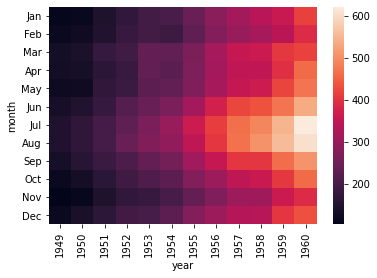

In [39]:
import seaborn as sns
import numpy as np
%matplotlib inline

example_four = sns.load_dataset("flights")
example_four = example_four.pivot("month","year","passengers")
display_four = sns.heatmap(example_four)

#### (6) Box Plot

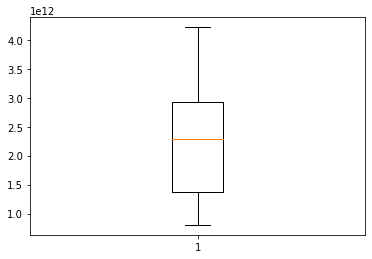

In [47]:
#Distribution of NMB Loans
plt.boxplot(loans_NMB)
plt.show()